In [58]:
import pandas as pd
import numpy as np
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter
import missingno as msno
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: "%.2f" % x)

In [59]:
# Columns needed to be parsed as datetime
dates = [
            
            "started_at",
            "ended_at"
]

# Drop columns
cols_to_drop = ["Year","start_time","end_time","start_date","end_date",]

# Read csv
df = pd.read_csv("bicycle_sharing_cleaned.csv",parse_dates=dates).drop(cols_to_drop,axis=1)


In [60]:
df.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,start_date,end_date,start_month,end_month
0,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,Lincoln Ave & Diversey Pkwy,member,2020-04-26,2020-04-26,April,April
1,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,Kosciuszko Park,member,2020-04-17,2020-04-17,April,April
2,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,Indiana Ave & Roosevelt Rd,member,2020-04-01,2020-04-01,April,April
3,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,Wood St & Augusta Blvd,member,2020-04-07,2020-04-07,April,April
4,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,Sheridan Rd & Lawrence Ave,casual,2020-04-18,2020-04-18,April,April


In [61]:
# Convert columns to category for lower memory usage
df[["rideable_type","member_casual"]] = df[["rideable_type","member_casual"]].astype("category")

In [62]:
df.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,start_date,end_date,start_month,end_month
0,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,Lincoln Ave & Diversey Pkwy,member,2020-04-26,2020-04-26,April,April
1,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,Kosciuszko Park,member,2020-04-17,2020-04-17,April,April
2,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,Indiana Ave & Roosevelt Rd,member,2020-04-01,2020-04-01,April,April
3,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,Wood St & Augusta Blvd,member,2020-04-07,2020-04-07,April,April
4,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,Sheridan Rd & Lawrence Ave,casual,2020-04-18,2020-04-18,April,April
...,...,...,...,...,...,...,...,...,...,...
14758108,classic_bike,2023-02-08 21:57:22,2023-02-08 22:08:06,Clark St & Wrightwood Ave,Sheffield Ave & Waveland Ave,member,2023-02-08,2023-02-08,February,February
14758109,electric_bike,2023-02-19 11:29:09,2023-02-19 11:39:11,Ogden Ave & Roosevelt Rd,Delano Ct & Roosevelt Rd,member,2023-02-19,2023-02-19,February,February
14758110,electric_bike,2023-02-07 09:01:33,2023-02-07 09:16:53,Clark St & Wrightwood Ave,Canal St & Madison St,casual,2023-02-07,2023-02-07,February,February
14758111,electric_bike,2023-02-22 08:33:22,2023-02-22 08:50:11,Clark St & Wrightwood Ave,Canal St & Madison St,casual,2023-02-22,2023-02-22,February,February


In [63]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14758113 entries, 0 to 14758112
Data columns (total 10 columns):
 #   Column              Dtype         
---  ------              -----         
 0   rideable_type       category      
 1   started_at          datetime64[ns]
 2   ended_at            datetime64[ns]
 3   start_station_name  object        
 4   end_station_name    object        
 5   member_casual       category      
 6   start_date          datetime64[ns]
 7   end_date            datetime64[ns]
 8   start_month         object        
 9   end_month           object        
dtypes: category(2), datetime64[ns](4), object(4)
memory usage: 4.3 GB


In [64]:
# Calculate the length of each ride by time
df["ride_length"] = df["ended_at"] - df["started_at"]

In [65]:
df["ride_length"].describe()

count                     14758113
mean     0 days 00:21:51.024610937
std      0 days 03:39:47.923015718
min             -21 days +19:50:02
25%                0 days 00:06:29
50%                0 days 00:11:39
75%                0 days 00:21:24
max               40 days 18:40:02
Name: ride_length, dtype: object

In [121]:
#?????
df[df["ride_length"] <= "-21 days +20:05:17"]

,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,start_date,end_date,start_month,end_month,ride_length
3009987,electric_bike,2020-12-15 11:35:39,2020-11-25 07:40:56,Sheffield Ave & Willow St,Sheffield Ave & Willow St,member,2020-12-15,2020-11-25,December,November,-21 days +20:05:17


In [111]:
df = df.drop(df.index[3044291])

In [125]:
df =df.drop(df.index[3009987])

In [126]:
df["ride_length"].describe()

count                     14758111
mean     0 days 00:21:51.260935427
std      0 days 03:39:32.289933967
min             -21 days +20:50:30
25%                0 days 00:06:29
50%                0 days 00:11:39
75%                0 days 00:21:24
max               40 days 18:40:02
Name: ride_length, dtype: object

In [75]:
month_series = df["start_month"].value_counts()

<AxesSubplot:>

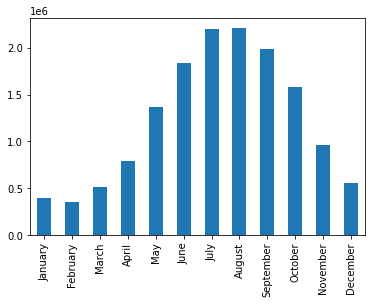

In [76]:
# Displays the number of rides per month
month_series.iloc[[10,11,9,7,5,3,1,0,2,4,6,8]].plot(kind="bar")

<AxesSubplot:>

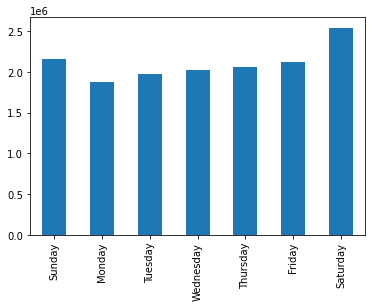

In [95]:
# Displays the number of rides per day
df["start_date"].dt.day_name().value_counts().iloc[[1,6,5,4,3,2,0]].plot(kind="bar")

In [78]:
members = df[df["member_casual"]== "member"]

In [79]:
casual = df[df["member_casual"]== "casual"]

In [82]:
print("number of casual riders:",len(casual))
print("number of member riders:",len(members))

number of casual riders: 6252131
number of member riders: 8505982


<AxesSubplot:>

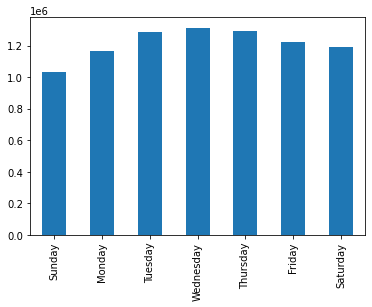

In [88]:
# Number of rides per day for members
members["start_date"].dt.day_name().value_counts().iloc[[6,5,2,0,1,3,4]].plot(kind="bar")

<AxesSubplot:>

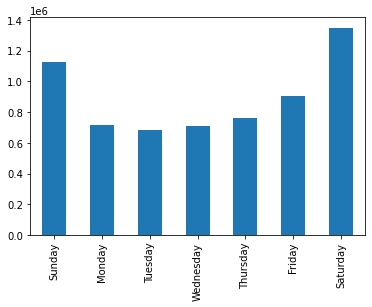

In [99]:
# Number of rides per day for casual riders
casual["start_date"].dt.day_name().value_counts().iloc[[1,4,6,5,3,2,0]].plot(kind="bar")

In [100]:
members["ride_length"].describe()

count                      8505982
mean     0 days 00:13:20.557256881
std      0 days 01:57:08.646789486
min             -21 days +19:50:02
25%                0 days 00:05:29
50%                0 days 00:09:34
75%                0 days 00:16:43
max               40 days 18:40:02
Name: ride_length, dtype: object

In [101]:
casual["ride_length"].describe()

count                      6252131
mean     0 days 00:33:25.511998548
std      0 days 05:08:26.549559029
min             -21 days +21:26:19
25%                0 days 00:08:38
50%                0 days 00:15:35
75%                0 days 00:29:12
max               38 days 20:24:09
Name: ride_length, dtype: object